---

# Test task: data analysis for a pet care start-up
## 'SQLite database queries'
### This is the analysis from the data of a small pet care start-up.
### I will explore the database, then perform several analytical steps using SQL queries.
### There will be Conversations and Bookings analysis.
### Daily Booking Rate and Take Rate. As well as A/B tests.
##### Performed by: Denis Shishkin [<a href="https://github.com/DanSib" target="_blank">github.com/DanSib</a>]

<a name="Head"></a>

### TABLE OF CONTENTS:

* [Data Source: 8 tables](#0.5)

* [Part 1. Exploring the Database (Test run)](#1.0)
> * [Part 1. Task 1. Users' number](#1.1)
> * [Part 1. Task 2. Users' number per period](#1.2)
> * [Part 1. Task 3. Percentage of users who have added pets](#1.3)
> * [Part 1. Task 4. Average number of pets added by users](#1.4)
> * [Part 1. Task 5. Percentage of pets play well with cats](#1.5)

* [Part 2. Conversations and Bookings](#2.0)
> * [Part 2. Task 1. Services and average price per each service type](#2.1)
> * [Part 2. Task 2. Numbers and booking rate by service](#2.2)
> * [Part 2. Task 3. Cancellation rates for each service](#2.3)
> * [Part 2. Task 4. Reviews by type and share analysis](#2.4)

* [Part 3. Recent Daily Booking Rate](#3.0)
> * [Part 3. Task 1. Daily booking rate before snapshot](#3.1)
> * [Part 3. Task 2. Trand analysis](#3.2)

* [Part 4. Analyzing Take Rate](#4.0)
> * [Part 4. Task 1. Gross billings and net revenue, monthly report](#4.1)
> * [Part 4. Task 2. Aggregate take rate (percentage of gross billings that is net revenue)](#4.2)
> * [Part 4. Task 3. Take Rate trend analysis](#4.3)
> * [Part 4. Task 4. Take Rate change causes - plots](#4.4)

* [Part 5. New Conversation Flow](#5.0)
> * [Part 5. Task 1. Hypothesis check: does new conversation page offer higher booking rate?](#5.1)
> * [Part 5. Task 2. Is this change statistically significant?](#5.2)
> * [Part 5. Task 3. Recommendations](#5.3)

* [Summary](#6.0)

<a name="TOP"></a><a href="#END"><font size="0.5">TO THE END</font></a><a name="0.2"></a><br/>

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="0.5"></a><br/>

### Database: db26.sqlite3

> * 8 tables
>> * conversations_conversation.csv
>> * conversations_conversation_pets.csv
>> * conversations_message.csv
>> * conversations_review.csv
>> * people_person.csv
>> * people_testsegmentation.csv
>> * pets_pet.csv
>> * services_service.csv

### Get libs and connection to Database

In [1]:
import pandas as pd
import numpy as np
import sqlite3 as sql
from plotly import graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from scipy import stats as st
import math as mth
import warnings

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 115)
warnings.filterwarnings('ignore')

In [3]:
# create connection to db
database = 'D:\EDA_GIT_Projects\Rover Material\db26.sqlite3'
connection = sql.connect(database)

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.0"></a><br/>

## I. Exploring the Database (Test run)

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.1"></a><br/>

### 1.1. How many users have signed up? The answer is 64416.

In [4]:
users_signed_up_total = pd.read_sql_query(
'''
SELECT COUNT(*) AS user_id_count FROM people_person;
'''
, connection)
users_signed_up_total

,user_id_count
0,64416


In [5]:
users_signed_up_total_v2 = pd.read_sql_query(
'''
SELECT COUNT (DISTINCT id) AS user_id_count FROM people_person;
'''
, connection)
users_signed_up_total_v2

,user_id_count
0,64416


<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.2"></a><br/>

### 1.2. How many users signed up prior to 2017-01-12? The answer is 35500.

In [6]:
users_signed_up_before = pd.read_sql_query(
'''
SELECT COUNT (DISTINCT id) AS user_id_count FROM people_person WHERE date_joined < '2017-01-12';
'''
, connection)
users_signed_up_before

,user_id_count
0,35500


<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.3"></a><br/>

### 1.3. What percentage of users have added pets? The answer is 80.44%.

In [7]:
users_added_pets_perc = pd.read_sql_query(
'''
SELECT
    -- pets_pet.pet_owner AS pet_owners,
    -- COUNT (DISTINCT people_person.id) AS all_users,
    printf ("%.2f", CAST (pets_pet.pet_owner as real) * 100 / COUNT (DISTINCT people_person.id)) AS users_with_pets_perc
FROM
    people_person,
    (
    SELECT 
        COUNT (DISTINCT owner_id) AS pet_owner 
    FROM 
        pets_pet
    ) AS pets_pet
;
'''
, connection)
users_added_pets_perc

,users_with_pets_perc
0,80.44


<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.4"></a><br/>

### 1.4. Of those users, how many pets have they added on average? The answer is 1.496.

In [8]:
pets_per_user_avg = pd.read_sql_query(
'''
SELECT
    -- COUNT (DISTINCT owner_id) AS all_owners,
    -- COUNT (DISTINCT id) AS all_pets,
    printf ("%.3f", COUNT (DISTINCT id) / CAST (COUNT (DISTINCT owner_id) as real) ) AS pets_per_user_avg
FROM
    pets_pet;
'''
, connection)
pets_per_user_avg

,pets_per_user_avg
0,1.496


<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="1.5"></a><br/>

### 1.5. What percentage of pets play well with cats? The answer is 24.78%.

In [9]:
pets_well_w_cats_perc = pd.read_sql_query(
'''
SELECT
    printf ("%.2f", AVG (plays_cats) * 100) AS perc_of_well_with_cats
FROM
    pets_pet;
'''
, connection)
pets_well_w_cats_perc

,perc_of_well_with_cats
0,24.78


---

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.0"></a><br/>

## II. Conversations and Bookings

* Some users can offer pet care services
* When an owner needs pet care, they can create a conversation with another user that offers the service they are interested in
* After exchanging some messages and possibly meeting in person, that conversation hopefully books
* In that case, services are paid for and delivered 
* Occasionally, some conversations that have booked may be cancelled
* Lastly, for un-cancelled bookings, both owners and sitters have the option of leaving a review
* In the following questions, we explore these concepts

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.1"></a><br/>

### 2.1. What are the possible services and what is the average price per unit for each service type?

In [10]:
avg_price_per_service = pd.read_sql_query(
'''
SELECT
    service_type AS list_of_services,
    printf ("%.2f", AVG (price) ) AS avg_price
FROM
    services_service
GROUP BY
    service_type;
'''
, connection)
avg_price_per_service

,list_of_services,avg_price
0,boarding,34.51
1,day-care,27.01
2,dog-walking,21.98


In [11]:
avg_price_per_service['avg_price'] = avg_price_per_service['avg_price'].astype('float')

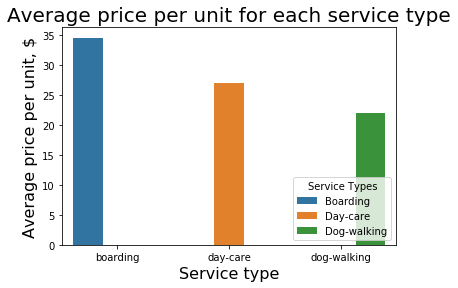

In [12]:
# Bar Chart for Average Price per Unit by Service Type

ax = sns.barplot(x='list_of_services', y='avg_price', data=avg_price_per_service, hue='list_of_services')
ax.set_title('Average price per unit for each service type', fontsize=20)
ax.set_xlabel('Service type', fontsize=16)
ax.set_ylabel('Average price per unit, $', fontsize=16)

labels=['Boarding','Day-care','Dog-walking']
hue, l = ax.get_legend_handles_labels()
ax.legend(hue, labels, title='Service Types', loc=4)

plt.show()

* Average price per service differs from one to another:
> * Boarding - the highest price near 34.5 Dollars
> * Day-care - second price with 27 Dollars
> * Dog-walking - lowest price per service with 22 Dollars

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.2"></a><br/>

### 2.2. 
### How many requests have there been for each service type and what percentage of those have booked? 
### The percentage of those that have booked is called booking rate, i.e. what is the booking rate by service?

In [13]:
request_per_service_type = pd.read_sql_query(
'''
SELECT
    services_service.service_type AS list_of_services,
    COUNT (conversations_conversation.id) AS requests_number,
    COUNT (conversations_conversation.booked_at) AS booked_number,
    printf ("%.2f", 
        COUNT (conversations_conversation.booked_at) *100 / 
            CAST (COUNT (conversations_conversation.id) as real) ) AS booking_rate
FROM
    conversations_conversation
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
GROUP BY
    services_service.service_type;
'''
, connection)
request_per_service_type

,list_of_services,requests_number,booked_number,booking_rate
0,boarding,26665,10862,40.74
1,day-care,26362,9417,35.72
2,dog-walking,26716,12811,47.95


In [14]:
request_per_service_type['booking_rate'] = request_per_service_type['booking_rate'].astype('float')

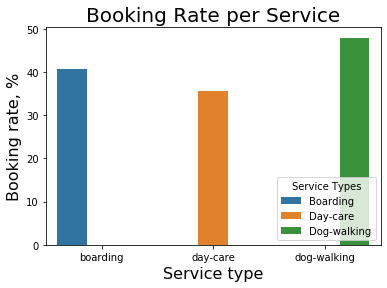

In [15]:
# Bar Chart for Booking Rates by Service Type

ax = sns.barplot(x='list_of_services', y='booking_rate', data=request_per_service_type, hue='list_of_services')
ax.set_title('Booking Rate per Service', fontsize=20)
ax.set_xlabel('Service type', fontsize=16)
ax.set_ylabel('Booking rate, %', fontsize=16)

labels=['Boarding','Day-care','Dog-walking']
hue, l = ax.get_legend_handles_labels()
ax.legend(hue, labels, title='Service Types', loc=4)

plt.show()

* Booking rate per service:
> * Boarding - 41%
> * Day-care - 36%
> * Dog-walking - 48%, the highest among all

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.3"></a><br/>

### 2.3. What are the cancellation rates for each service?

In [16]:
cancellation_rates_per_service_type = pd.read_sql_query(
'''
SELECT
    services_service.service_type AS list_of_services,
    COUNT (conversations_conversation.id) AS requests_number,
    COUNT (conversations_conversation.booked_at) AS booked_number,
    printf ("%.2f", 
        COUNT (conversations_conversation.booked_at) *100 / 
            CAST (COUNT (conversations_conversation.id) as real) ) AS booking_rate,
    COUNT (conversations_conversation.cancelled_at) AS cancelled_number,
    printf ("%.2f", 
        COUNT (conversations_conversation.cancelled_at) *100 / 
            CAST (COUNT (conversations_conversation.booked_at) as real) ) AS cancelled_rate
FROM
    conversations_conversation
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
GROUP BY
    services_service.service_type;
'''
, connection)
cancellation_rates_per_service_type

,list_of_services,requests_number,booked_number,booking_rate,cancelled_number,cancelled_rate
0,boarding,26665,10862,40.74,1051,9.68
1,day-care,26362,9417,35.72,919,9.76
2,dog-walking,26716,12811,47.95,1218,9.51


In [17]:
cancellation_rates_per_service_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   list_of_services  3 non-null      object
 1   requests_number   3 non-null      int64 
 2   booked_number     3 non-null      int64 
 3   booking_rate      3 non-null      object
 4   cancelled_number  3 non-null      int64 
 5   cancelled_rate    3 non-null      object
dtypes: int64(3), object(3)
memory usage: 272.0+ bytes


In [18]:
cancellation_rates_per_service_type['cancelled_rate'] = cancellation_rates_per_service_type['cancelled_rate'].astype('float')

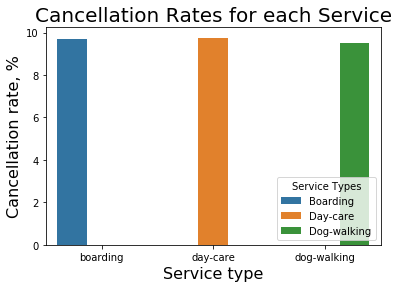

In [19]:
# Bar Chart for Cancellation Rates by Service Type

ax = sns.barplot(x='list_of_services', y='cancelled_rate', data=cancellation_rates_per_service_type, hue='list_of_services')
ax.set_title('Cancellation Rates for each Service', fontsize=20)
ax.set_xlabel('Service type', fontsize=16)
ax.set_ylabel('Cancellation rate, %', fontsize=16)

labels=['Boarding','Day-care','Dog-walking']
hue, l = ax.get_legend_handles_labels()
ax.legend(hue, labels, title='Service Types', loc=4)

plt.show()

* Cancellation rates by service:
> * Boarding - 9.7%
> * Day-care - 9.8%
> * Dog-walking - 9.5% - the lowest cancellation rate among all

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="2.4"></a><br/>

### 2.4. 
### For un-cancelled bookings, is the owner or provider more likely to leave a review and which tends to leave better reviews? 
### How would you narrate this finding to a business partner? 
### Feel free to use whatever “proof” you need to share these findings (visualizations, graphs, talking points, etc.).

In [20]:
reviews_study = pd.read_sql_query(
'''
SELECT
    --conversations_conversation.id,
    --conversations_conversation.cancelled_at,
    conversations_review.stars,
    --conversations_review.reviewer_id,
    --conversations_conversation.requester_id,
    --services_service.provider_id,
    SUM (CASE WHEN reviewer_id == requester_id THEN 1 ELSE 0 END) AS requester_review_number,
    printf ("%.2f", 
        SUM (CASE WHEN reviewer_id == requester_id THEN 1 ELSE 0 END) *100 / 22493.00) AS requester_review_share, 
        --need to find automation to sum column after GROUP BY--
    SUM (CASE WHEN reviewer_id == provider_id THEN 1 ELSE 0 END) AS provider_review_number,
    printf ("%.2f", 
        SUM (CASE WHEN reviewer_id == provider_id THEN 1 ELSE 0 END) *100 / 6043.00) AS provider_review_share,    
    printf ("%.2f", 
        AVG (CASE WHEN reviewer_id == requester_id THEN 1 ELSE 0 END) *100) AS requester_review_perc,
    printf ("%.2f", 
        AVG (CASE WHEN reviewer_id == provider_id THEN 1 ELSE 0 END) *100) AS provider_review_perc
FROM
    conversations_conversation
LEFT JOIN conversations_review ON conversations_review.conversation_id = conversations_conversation.id
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
WHERE
    conversations_review.stars IS NOT NULL
GROUP BY
    stars;
'''
, connection)
reviews_study

,stars,requester_review_number,requester_review_share,provider_review_number,provider_review_share,requester_review_perc,provider_review_perc
0,1,1368,6.08,683,11.30,66.70,33.30
1,2,1359,6.04,673,11.14,66.88,33.12
2,3,1246,5.54,651,10.77,65.68,34.32
3,4,1324,5.89,680,11.25,66.07,33.93
4,5,17196,76.45,3356,55.54,83.67,16.33


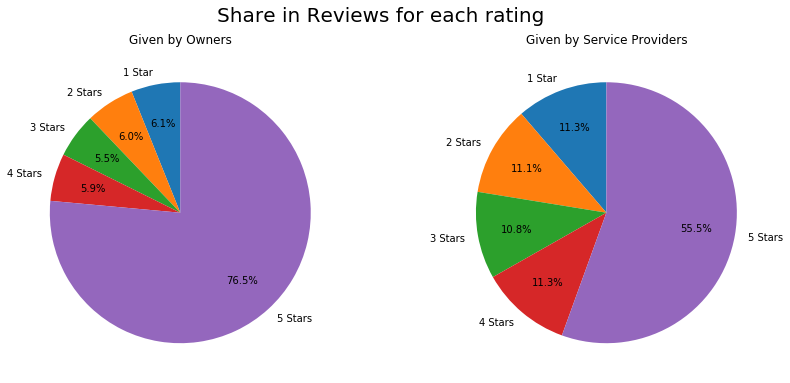

In [21]:
# Pie Charts for Review Share by Rating Star

#labels = reviews_study['stars']
labels = '1 Star', '2 Stars', '3 Stars', '4 Stars', '5 Stars'
sizes1 = reviews_study['requester_review_number']
sizes2 = reviews_study['provider_review_number']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

ax1.pie(sizes1, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7, labeldistance=1.1)
ax1.set(title='Given by Owners')

ax2.pie(sizes2, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.7, labeldistance=1.1)
ax2.set(title='Given by Service Providers')

fig.suptitle('Share in Reviews for each rating', fontsize=20)

plt.show()

#### Comment:

* Reviews:
> * number of reviews: requesters (owners) give 5 times more reviews than providers
> * owners tend to give more 5-star reviews from total number (76%), providers give reviews to other stars twice more than requestors: ~11% vs. ~6%
> * totally owners’ shares by each star are at least two times higher than providers
* Average price per service differs from one to another:
> * Boarding - the highest price near 34.5 Dollars
> * Day-care - second price with 27 Dollars
> * Dog-walking - lowest price per service with 22 Dollars
* Booking rate per service:
> * Boarding - 41%
> * Day-care - 36%
> * Dog-walking - 48%, the highest among all
* Cancellation rates by service:
> * Boarding - 9.7%
> * Day-care - 9.8%
> * Dog-walking - 9.5% - the lowest cancellation rate among all

---

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.0"></a><br/>

## III. Recent Daily Booking Rate

* The snapshot of this database was taken on 2017-07-11 at midnight and only contains data reflecting events prior to that date
* A junior analyst is investigating daily booking rate during the days prior to the snapshot and is concerned about an apparent downward trend
* You are tasked with helping them out. This is the chart they produced:
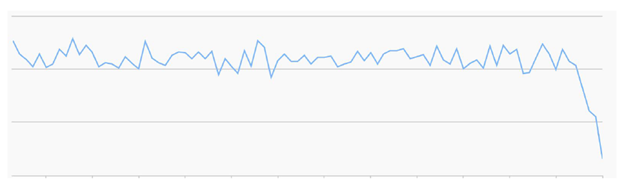

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.1"></a><br/>

### 3.1. First, let us reproduce their results. 
* 1)	What is the daily booking rate (defined in Question II.2) for each of the 90 days prior to the snapshot? 
* 2)	Do you also find a downward trend?

In [22]:
booking_rate_90days = pd.read_sql_query(
'''
SELECT
    date(conversations_conversation.added) AS date,
    COUNT (date(conversations_conversation.added)) AS requests_number,
    COUNT (date(conversations_conversation.booked_at)) AS bookings_number,
    printf ("%.2f", 
        COUNT (date(conversations_conversation.booked_at)) *100 / 
            CAST (COUNT (date(conversations_conversation.added)) as real) ) AS booking_rate
FROM
    conversations_conversation
WHERE
    date(conversations_conversation.added) BETWEEN '2017-04-12' AND '2017-07-10'
GROUP BY
    date
ORDER BY
    date
;
'''
, connection)
booking_rate_90days.head()

,date,requests_number,bookings_number,booking_rate
0,2017-04-12,213,108,50.70
1,2017-04-13,226,103,45.58
2,2017-04-14,213,93,43.66
3,2017-04-15,213,87,40.85
4,2017-04-16,206,94,45.63


In [23]:
booking_rate_90days.tail()

,date,requests_number,bookings_number,booking_rate
85,2017-07-06,269,111,41.26
86,2017-07-07,278,91,32.73
87,2017-07-08,274,66,24.09
88,2017-07-09,320,70,21.88
89,2017-07-10,290,18,6.21


In [24]:
booking_rate_90days['booking_rate'] = booking_rate_90days['booking_rate'].astype('float')
booking_rate_90days['year_month'] = pd.to_datetime(booking_rate_90days['date'], format='%Y-%m')

In [25]:
print(booking_rate_90days['year_month'].min())
print(booking_rate_90days['year_month'].max())

2017-04-12 00:00:00
2017-07-10 00:00:00


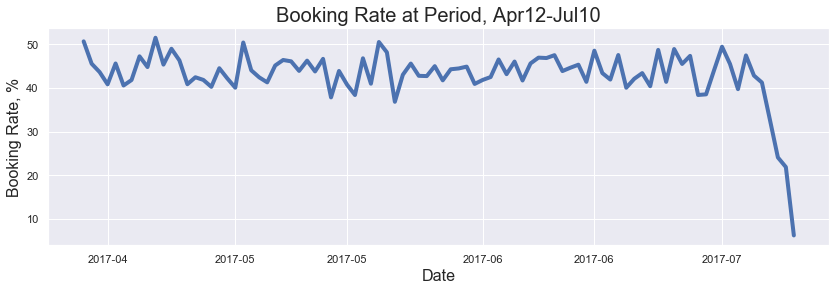

In [26]:
# Line Chart for Booking Rate per given Period: 2017-04-12, 2017-07-10

plt.figure(figsize=(14,4))
sns.set(style="darkgrid")

ax = sns.lineplot(x='year_month', y='booking_rate', data=booking_rate_90days, linewidth=4)

ax.set_title('Booking Rate at Period, Apr12-Jul10', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Booking Rate, %', fontsize=16)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

> * We have reproduced the results of initial query and we observe a downward trend in Jul 08-10, 2017

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="3.2"></a><br/>

### 3.2. 
### Can you narrate a reason why this trend exists? 
### Is there a reason to be concerned?

In [27]:
booking_rate_downward_check = pd.read_sql_query(
'''
SELECT 
    *
FROM
    conversations_conversation
WHERE
    date(conversations_conversation.added) BETWEEN '2017-07-10' AND '2017-07-10' AND
    date(conversations_conversation.booked_at) IS NOT NULL
;
'''
, connection)
booking_rate_downward_check.head()

,id,start_date,end_date,units,added,booking_total,cancellation_fault,requester_id,service_id,booked_at,cancelled_at
0,208503,2017-07-20,2017-07-23,3,2017-07-10 12:30:09.961107,69,None,64149,94055,2017-07-11 03:08:27.991870,None
1,209229,2017-07-20,2017-07-22,2,2017-07-10 13:29:06.923471,132,None,63305,85060,2017-07-11 16:46:19.541943,None
2,218100,2017-07-17,2017-07-23,6,2017-07-10 09:42:24.175297,96,None,57293,80112,2017-07-11 16:26:11.679306,None
3,219743,2017-07-21,2017-07-26,5,2017-07-10 17:19:45.975326,190,None,56247,77245,2017-07-11 13:00:18.732453,None
4,220160,2017-07-18,2017-07-24,6,2017-07-10 14:16:30.102356,168,None,56000,96991,2017-07-11 11:24:16.313224,None


#### Comment:

> * As soon as we have the snapshot of the database which was taken on 2017-07-11 at midnight and only contains data reflecting events prior to that date, there is no data with conversations happened later than this cut and not all of the bookings were uploaded
> * There no reason to be concerned about it, data will be uploaded later with next update
> * It would be correct to analyse the period using sorting on the columns "end_date" or "start_date" of the period of services provided to be sure requestor has already received or would receive a service 

---

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.0"></a><br/>

## IV. Analyzing Take Rate

* In order to do the next exercise, you will need to understand the fee structure for this company
* Each user has a fee associated with their account (recorded on people_person)
* If that user books as an owner, the company charges an owner fee (in addition to the booking total) that is a percentage of the booking total (to a maximum of 50 Dollars) 
* Also, each service has a fee amount (recorded on services_service)

* Before a provider receives their payment, the company takes a percentage of the booking total as dictated by that fee
* As an example, suppose an owner has a fee amount of 5% and books with a service that has a fee amount of 15% 
* If the booking was for 100 Dollars, then the owner would get charged 105 Dollars (adding the owner’s fee)
* The 5 Dollar owner fee would go to the company
* An additional 15 Dollars would also go to the company since the service had a 15% fee associated to it
* The remaining 85 Dollars would go to the provider

* To summarize:
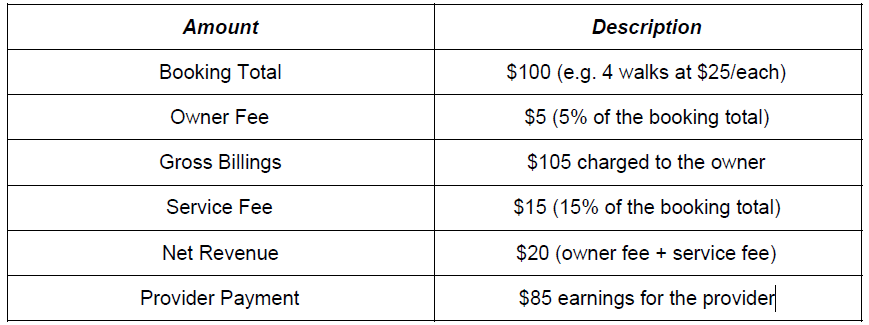

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.1"></a><br/>

### 4.1. In each month, what were the gross billings and net revenue? 
* (Note: month is determined by when the request actually booked, i.e. booked_at)

In [28]:
# prepare ground for further calculations (when "owner_fee" does not exceed $50)

billings_base = pd.read_sql_query(
'''
SELECT 
    date(conversations_conversation.booked_at) AS date,
    strftime('%Y', conversations_conversation.booked_at) AS year,
    strftime('%m', conversations_conversation.booked_at) AS month,
    conversations_conversation.booking_total AS booking_total,
    conversations_conversation.requester_id AS requester_id,
    conversations_conversation.service_id AS service_id,
    people_person.fee AS fee_owner_perc,
    services_service.fee AS fee_service_perc,
    conversations_conversation.booking_total + 
        (conversations_conversation.booking_total * people_person.fee) AS gross_billing,
    CASE
        WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        ELSE conversations_conversation.booking_total * people_person.fee END AS owner_fee,
    conversations_conversation.booking_total * services_service.fee AS service_fee,
    (CASE
        WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        ELSE conversations_conversation.booking_total * people_person.fee END) + 
        (conversations_conversation.booking_total * services_service.fee) AS net_revenue
FROM
    conversations_conversation
LEFT JOIN people_person ON people_person.id = conversations_conversation.requester_id
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
WHERE
    conversations_conversation.booked_at IS NOT NULL AND
    conversations_conversation.cancelled_at IS NULL
ORDER BY
    date
;
'''
, connection)
billings_base

,date,year,month,booking_total,requester_id,service_id,fee_owner_perc,fee_service_perc,gross_billing,owner_fee,service_fee,net_revenue
0,2015-07-20,2015,07,140,47405,77257,0.02,0.15,142.80,2.80,21.00,23.80
1,2015-07-21,2015,07,46,58799,77267,0.02,0.15,46.92,0.92,6.90,7.82
2,2015-07-21,2015,07,125,15305,77295,0.02,0.15,127.50,2.50,18.75,21.25
3,2015-07-29,2015,07,532,17983,77260,0.02,0.15,542.64,10.64,79.80,90.44
4,2015-07-30,2015,07,192,56718,77168,0.02,0.15,195.84,3.84,28.80,32.64
...,...,...,...,...,...,...,...,...,...,...,...,...
29897,2017-07-11,2017,07,360,15793,90245,0.07,0.20,385.20,25.20,72.00,97.20
29898,2017-07-11,2017,07,540,15109,85984,0.07,0.15,577.80,37.80,81.00,118.80
29899,2017-07-11,2017,07,156,14980,79842,0.07,0.20,166.92,10.92,31.20,42.12
29900,2017-07-11,2017,07,468,14658,89830,0.07,0.20,500.76,32.76,93.60,126.36


In [29]:
# check the formula for owner_fee + service_fee = net_revenue, where "owner_fee" does not exceed $50

#billings_base.sort_values(by='owner_fee', ascending=False)

In [30]:
billings_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29902 entries, 0 to 29901
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              29902 non-null  object 
 1   year              29902 non-null  object 
 2   month             29902 non-null  object 
 3   booking_total     29902 non-null  int64  
 4   requester_id      29902 non-null  int64  
 5   service_id        29902 non-null  int64  
 6   fee_owner_perc    29902 non-null  float64
 7   fee_service_perc  29902 non-null  float64
 8   gross_billing     29902 non-null  float64
 9   owner_fee         29902 non-null  float64
 10  service_fee       29902 non-null  float64
 11  net_revenue       29902 non-null  float64
dtypes: float64(6), int64(3), object(3)
memory usage: 2.7+ MB


In [31]:
# check the sum for random month for double-check

gross_billing_check = billings_base.query('year == "2016" and month == "07"')
#print(gross_billing_check.head())
print(gross_billing_check['gross_billing'].sum())
print(gross_billing_check['net_revenue'].sum())

202623.45
41614.55


In [32]:
billings = pd.read_sql_query(
'''
SELECT 
    --date(conversations_conversation.booked_at) AS date,
    strftime('%Y-%m', conversations_conversation.booked_at) AS year_month,
    --strftime('%m', conversations_conversation.booked_at) AS month,
    --conversations_conversation.booking_total AS booking_total,
    --conversations_conversation.requester_id AS requester_id,
    --conversations_conversation.service_id AS service_id,
    --people_person.fee AS fee_owner_perc,
    --services_service.fee AS fee_service_perc,
    SUM (conversations_conversation.booking_total + 
        (conversations_conversation.booking_total * people_person.fee)) AS gross_billing,
    --CASE
        --WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        --ELSE conversations_conversation.booking_total * people_person.fee END AS owner_fee,
    --conversations_conversation.booking_total * services_service.fee AS service_fee,
    SUM (
    (CASE
        WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        ELSE conversations_conversation.booking_total * people_person.fee END) + 
        (conversations_conversation.booking_total * services_service.fee)) AS net_revenue
FROM
    conversations_conversation
LEFT JOIN people_person ON people_person.id = conversations_conversation.requester_id
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
WHERE
    conversations_conversation.booked_at IS NOT NULL AND
    conversations_conversation.cancelled_at IS NULL
GROUP BY
    year_month
;
'''
, connection)
billings

,year_month,gross_billing,net_revenue
0,2015-07,1055.70,175.95
1,2015-08,11853.42,1975.57
2,2015-09,19318.80,3219.80
3,2015-10,36275.28,6045.88
4,2015-11,37483.98,6247.33
5,2015-12,58121.94,10395.29
6,2016-01,72364.38,13450.03
7,2016-02,81072.27,15187.32
8,2016-03,129527.10,24320.70
9,2016-04,140830.95,26476.45


In [33]:
billings['year_month'] = pd.to_datetime(billings['year_month'], format='%Y-%m')

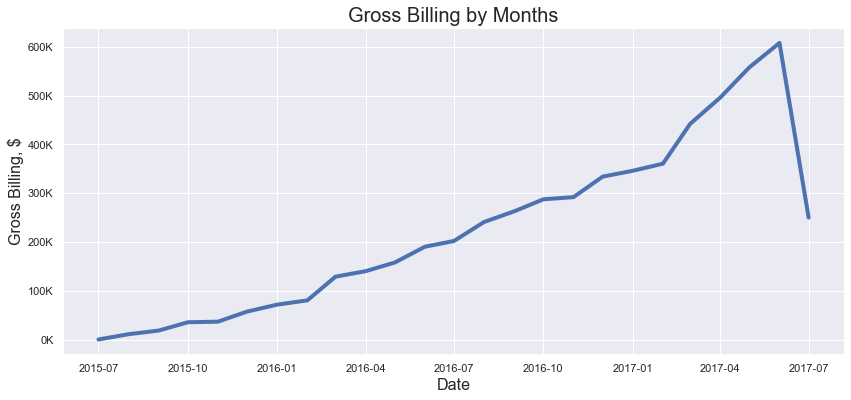

In [34]:
# Line Chart for Gross Billings by Months

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")

ax1 = sns.lineplot(x='year_month', y='gross_billing', data=billings, linewidth=4)
ax1.set_title('Gross Billing by Months', fontsize=20)
ax1.set_xlabel('Date', fontsize=16)

ax1.set_ylabel('Gross Billing, $', fontsize=16)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

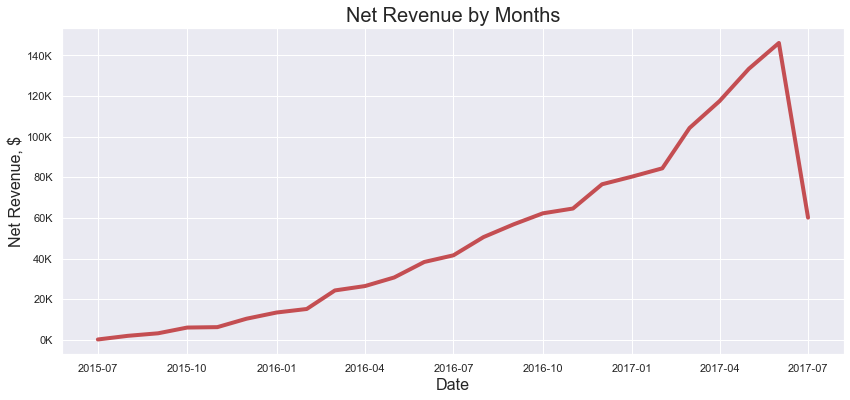

In [35]:
# Line Chart for Net Revenues by Months

plt.figure(figsize=(14,6))
sns.set(style="darkgrid")

ax1 = sns.lineplot(x='year_month', y='net_revenue', data=billings, color='r', linewidth=4)

ax1.set_title('Net Revenue by Months', fontsize=20)
ax1.set_xlabel('Date', fontsize=16)

ax1.set_ylabel('Net Revenue, $', fontsize=16)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

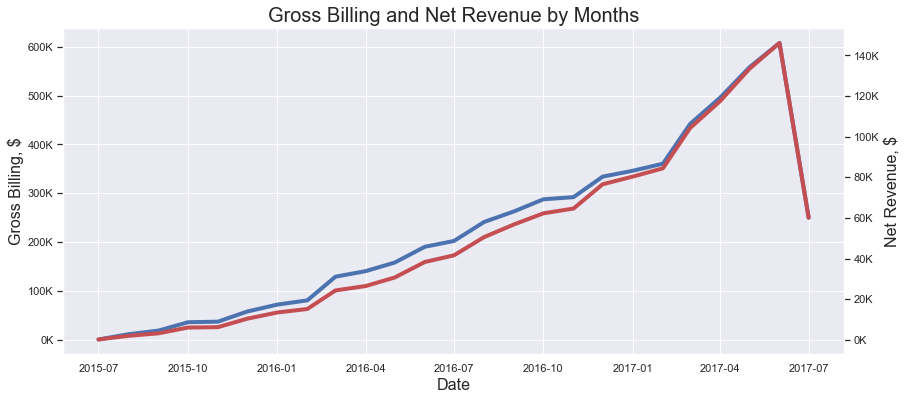

In [36]:
# Line Chart for Gross Billings and Net Revenue by Months (together)

plt.figure(figsize=(14,6))
sns.set(style='darkgrid')

ax1 = sns.lineplot(x='year_month', y='gross_billing', data=billings, linewidth=4)

ax2 = ax1.twinx()
ax2 = sns.lineplot(x='year_month', y='net_revenue', data=billings, color='r', linewidth=4, legend='full')
ax2.grid(False)

ax1.set_title('Gross Billing and Net Revenue by Months', fontsize=20)
ax1.set_xlabel('Date', fontsize=16)

ax1.set_ylabel('Gross Billing, $', fontsize=16)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax1.get_yticks()/1000]
ax1.set_yticklabels(ylabels)

ax2.set_ylabel('Net Revenue, $', fontsize=16)
ylabels = ['{:,.0f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax2.set_yticklabels(ylabels)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax1.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

> * Chart shows confidently growing figures of Gross Billing and Net Revenue over two years
> * During 2016 Net Revenue demonstrates slightly lower trend vs. Gross Billing
> * Since February 2017 till June 2017 we notice distinct growth in Gross Billings and Net Revenue
> * As we already know we should not look at the 2017 July data as soon as it was not updated yet

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.2"></a><br/>

### 4.2. Define take rate to be the percentage of gross billings that is net revenue. 

* In the previous example, the take rate is slightly more than 19% since 20 Dollars/105 Dollars is approximately 0.1905
* In each month, what was the aggregate take rate?

In [37]:
take_rate_aggreg = pd.read_sql_query(
'''
SELECT
    strftime('%Y-%m', conversations_conversation.booked_at) AS year_month,
    SUM (conversations_conversation.booking_total + 
        (conversations_conversation.booking_total * people_person.fee)) AS gross_billing,
    SUM (
    (CASE
        WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        ELSE conversations_conversation.booking_total * people_person.fee END) + 
        (conversations_conversation.booking_total * services_service.fee)) AS net_revenue,
    printf ("%.2f", 
        SUM (
        (CASE
        WHEN conversations_conversation.booking_total * people_person.fee > 50 THEN 50
        ELSE conversations_conversation.booking_total * people_person.fee END) + 
        (conversations_conversation.booking_total * services_service.fee))
        * 100 / 
        SUM (conversations_conversation.booking_total + 
        (conversations_conversation.booking_total * people_person.fee)) 
        ) AS take_rate_aggregated
FROM
    conversations_conversation
LEFT JOIN people_person ON people_person.id = conversations_conversation.requester_id
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
WHERE
    conversations_conversation.booked_at IS NOT NULL AND
    conversations_conversation.cancelled_at IS NULL
GROUP BY
    year_month
;
'''
, connection)
take_rate_aggreg

,year_month,gross_billing,net_revenue,take_rate_aggregated
0,2015-07,1055.70,175.95,16.67
1,2015-08,11853.42,1975.57,16.67
2,2015-09,19318.80,3219.80,16.67
3,2015-10,36275.28,6045.88,16.67
4,2015-11,37483.98,6247.33,16.67
5,2015-12,58121.94,10395.29,17.89
6,2016-01,72364.38,13450.03,18.59
7,2016-02,81072.27,15187.32,18.73
8,2016-03,129527.10,24320.70,18.78
9,2016-04,140830.95,26476.45,18.80


> * Data range is 25 months: Jul 2015 - Jul 2017
> * First months of the period the take rate is almost 17%
> * Latest data shows 24% Take Rate in Jul 2017

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.3"></a><br/>

### 4.3. Did take rate trend up or trend down or remain unchanged over time?

In [38]:
# data for chart
take_rate_aggreg_data = take_rate_aggreg.drop(['gross_billing','net_revenue'], axis=1)

In [39]:
# convert data in columns to show the graph 
take_rate_aggreg_data['take_rate_aggregated'] = take_rate_aggreg_data['take_rate_aggregated'].astype('float')
take_rate_aggreg_data['year_month'] = pd.to_datetime(take_rate_aggreg_data['year_month'].astype(str), format='%Y-%m')

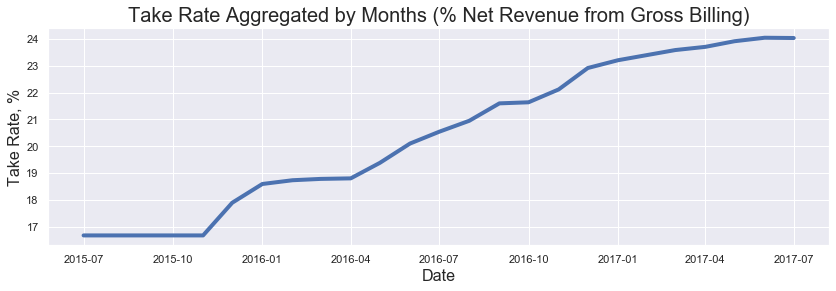

In [40]:
# Line Chart for Take Rate aggregated by Months

plt.figure(figsize=(14,4))
sns.set(style="darkgrid")

ax = sns.lineplot(x='year_month', y='take_rate_aggregated', data=take_rate_aggreg_data, linewidth=4)

ax.set_title('Take Rate Aggregated by Months (% Net Revenue from Gross Billing)', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Take Rate, %', fontsize=16)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

> * First observations in 2015 (Jul-Nov) show 16.67% as aggregated Take Rate level
> * There is visible growth started Dec 2015 at 17.89% and reached 24.08% Jul 2017
> * We can definitely see the growth in Net Revenue share in Gross Billings

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="4.4"></a><br/>

### 4.4. Take Rate change causes - analysis.

* If it did change, investigate why and provide an explanation
* Be sure to provide additional data/charts/evidence that justify your explanation
* Any claims should be backed by data

> * It seems that owner fee and service fee are the cause of the Take Rate change over past 24 months
> * Let's look at the distribution of average fee level

> * Owner Fee analysis

In [41]:
# convert data to datetime format
billings_base['year_month'] = pd.to_datetime(
    billings_base['year'].astype(str) + billings_base['month'].astype(str), format='%Y%m')

In [42]:
billings_base.head()

,date,year,month,booking_total,requester_id,service_id,fee_owner_perc,fee_service_perc,gross_billing,owner_fee,service_fee,net_revenue,year_month
0,2015-07-20,2015,07,140,47405,77257,0.02,0.15,142.80,2.80,21.00,23.80,2015-07-01
1,2015-07-21,2015,07,46,58799,77267,0.02,0.15,46.92,0.92,6.90,7.82,2015-07-01
2,2015-07-21,2015,07,125,15305,77295,0.02,0.15,127.50,2.50,18.75,21.25,2015-07-01
3,2015-07-29,2015,07,532,17983,77260,0.02,0.15,542.64,10.64,79.80,90.44,2015-07-01
4,2015-07-30,2015,07,192,56718,77168,0.02,0.15,195.84,3.84,28.80,32.64,2015-07-01


In [43]:
billings_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29902 entries, 0 to 29901
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              29902 non-null  object        
 1   year              29902 non-null  object        
 2   month             29902 non-null  object        
 3   booking_total     29902 non-null  int64         
 4   requester_id      29902 non-null  int64         
 5   service_id        29902 non-null  int64         
 6   fee_owner_perc    29902 non-null  float64       
 7   fee_service_perc  29902 non-null  float64       
 8   gross_billing     29902 non-null  float64       
 9   owner_fee         29902 non-null  float64       
 10  service_fee       29902 non-null  float64       
 11  net_revenue       29902 non-null  float64       
 12  year_month        29902 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int64(3), object(3)
memory usage: 3.0+ MB


In [44]:
# get average owner fee per month per period 
owner_fee_change_pivot = billings_base.pivot_table(
    index='year_month', values='fee_owner_perc').reset_index()
owner_fee_change_pivot

,year_month,fee_owner_perc
0,2015-07-01,0.020000
1,2015-08-01,0.020000
2,2015-09-01,0.020000
3,2015-10-01,0.020000
4,2015-11-01,0.020000
5,2015-12-01,0.035090
6,2016-01-01,0.044455
7,2016-02-01,0.045796
8,2016-03-01,0.046692
9,2016-04-01,0.046992


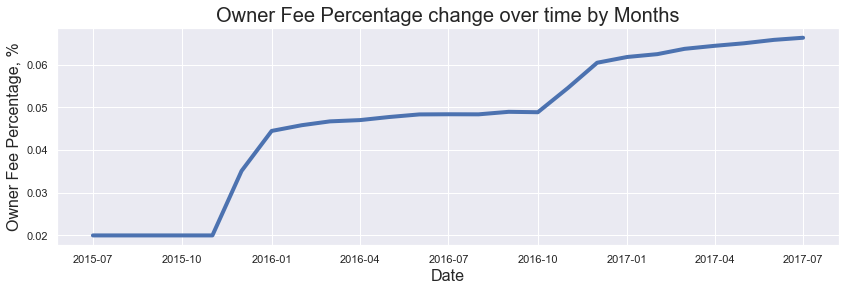

In [45]:
# Line Chart for Owner Fee Percentage change over time by Months

plt.figure(figsize=(14,4))
sns.set(style="darkgrid")

ax = sns.lineplot(x='year_month', y='fee_owner_perc', data=owner_fee_change_pivot, linewidth=4)

ax.set_title('Owner Fee Percentage change over time by Months', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Owner Fee Percentage, %', fontsize=16)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

> * First reason for the Take Rate increase is owner fee percentage increase over time
> * Till Dec 2015 this fee is 2% and then it made two major leaps at the beginning of 2016 and at the beginning of 2017
> * Finally at the July 2017 the average owner fee is 6.6% vs. 2% two years before

> * Service Fee analysis

In [46]:
# get average service fee per month per period 
service_fee_change_pivot = billings_base.pivot_table(
    index='year_month', values='service_fee').reset_index()
service_fee_change_pivot

,year_month,service_fee
0,2015-07-01,31.050000
1,2015-08-01,34.179412
2,2015-09-01,26.064220
3,2015-10-01,27.640415
4,2015-11-01,23.966739
5,2015-12-01,25.368524
6,2016-01-01,24.636611
7,2016-02-01,24.683758
8,2016-03-01,28.042749
9,2016-04-01,26.622032


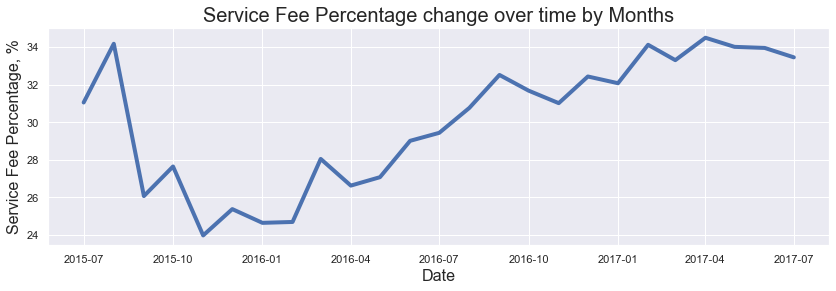

In [47]:
# Line Chart for Service Fee Percentage change over time by Months

plt.figure(figsize=(14,4))
sns.set(style="darkgrid")

ax = sns.lineplot(x='year_month', y='service_fee', data=service_fee_change_pivot, linewidth=4)

ax.set_title('Service Fee Percentage change over time by Months', fontsize=20)
ax.set_xlabel('Date', fontsize=16)
ax.set_ylabel('Service Fee Percentage, %', fontsize=16)

months = mdates.MonthLocator()
years = mdates.YearLocator()
years_monthsFmt = mdates.DateFormatter('%Y-%m')

#ax.xaxis.set_major_locator(months)
#ax.xaxis.set_minor_locator(months)
ax.xaxis.set_major_formatter(years_monthsFmt)

plt.show()

> * Despite high service fee level at the beginning of the period it dropped from 34% high at Aug 2015 to 24% low at Nov 2015
> * Then we see stable gradual growth in service fee rate from 24% to the highest 34.5% in Apr 2017

> * Owner Fee and Service Fee are the only contributors to the growth of Take Rate for the last 24 months

#### Comment:

* Gross Billings and Net Revenue:
> * We see confidently growing figures of Gross Billing and Net Revenue over two years
> * During 2016 Net Revenue demonstrates slightly lower trend vs. Gross Billing
> * Since February 2017 till June 2017 we notice distinct growth in Gross Billings and Net Revenue
> * As we already know we should not look at the 2017 July data as soon as it was not updated yet
* Take Rate (Net Revenue percentage out of Gross Billing):
> * Data range is 25 months: Jul 2015 - Jul 2017
> * First months of the period the take rate is almost 17%
> * Latest data shows 24% Take Rate in Jul 2017
* Trend:
> * First observations in 2015 (Jul-Nov) show 16.67% as aggregated Take Rate level
> * There is visible growth started Dec 2015 at 17.89% and reached 24.08% Jul 2017
> * We can definitely see the growth in Net Revenue share in Gross Billings
* Take Rate change causes:
> * Owner Fee and Service Fee are the contributors to the growth of Take Rate for the last 24 months

---

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="5.0"></a><br/>

## V. New Conversation Flow

* Internal documents indicate that this recently acquired company was performing many A/B tests; we would like to investigate one
* This platform had a conversation page where owners and service providers could exchange messages as they organized their booking
* The team thought this page could use a re-design and set out to improve its UI
* A product manager then set up a test to measure the new page's effectiveness
* On 2017-03-13, an A/B test was launched
* For those owners who sent a request, they would be randomly assigned to variant or holdout groups
* Those users who are in the variant group would see the new conversation flow
* However, those in the holdout group would see the old conversation flow
* Providers would always see the old conversation flow

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="5.1"></a><br/>

### 5.1. Did conversations with the new conversation page book at a higher rate?

In [48]:
test_data = pd.read_sql_query(
'''
SELECT
    *
FROM
    people_testsegmentation 
;
'''
, connection)
test_data.sample(10)

,id,test_name,test_group,added,person_id
3630,65055,Email Test,variant,2017-04-11 07:16:03.916289,3631
4541,65966,Email Test,holdout,2016-07-26 17:47:19.431778,4542
39233,100658,Email Test,holdout,2016-05-25 05:13:44.441968,39234
30910,92335,Email Test,holdout,2017-07-09 11:25:07.173220,30911
7984,69409,Email Test,holdout,2016-10-23 16:14:51.518225,7985
59716,121141,Email Test,holdout,2016-05-22 15:05:46.969491,59717
18593,80018,Email Test,holdout,2016-05-27 04:01:51.285365,18594
18936,80361,Email Test,holdout,2015-11-21 02:22:54.458673,18937
36731,98156,Email Test,holdout,2017-01-29 14:38:02.088089,36732
66023,127448,New Conversation Flow,variant,2017-04-28 18:58:49.199229,62200


In [49]:
test_data_by_name = pd.read_sql_query(
'''
SELECT
    test_name AS test_name,
    test_group AS test_group,
    COUNT (person_id) AS id_number
    --COUNT (DISTINCT person_id) AS id_unique_number
FROM
    people_testsegmentation 
GROUP BY
    test_name,
    test_group
;
'''
, connection)
test_data_by_name

,test_name,test_group,id_number
0,Email Test,holdout,48378
1,Email Test,variant,16038
2,New Conversation Flow,holdout,11751
3,New Conversation Flow,variant,11749


> * Two tests were performed: "Email Test" and "New Conversation Flow"
> * We will look at "New Conversation Flow" test (23 500 unique id)
> * Test groups are equal in quantity (diff<1%) - test possible

In [50]:
# check the period of test

# set date column
test_data['date'] = pd.to_datetime(test_data['added'], format='%Y-%m')

# query data for the test
focus_test_data = test_data.query('test_name == "New Conversation Flow"')
focus_test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23500 entries, 64416 to 87915
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          23500 non-null  int64         
 1   test_name   23500 non-null  object        
 2   test_group  23500 non-null  object        
 3   added       23500 non-null  object        
 4   person_id   23500 non-null  int64         
 5   date        23500 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.3+ MB


In [51]:
print(focus_test_data['date'].min())
print(focus_test_data['date'].max())

2017-03-13 03:14:31.362316
2017-07-10 21:19:32.859193


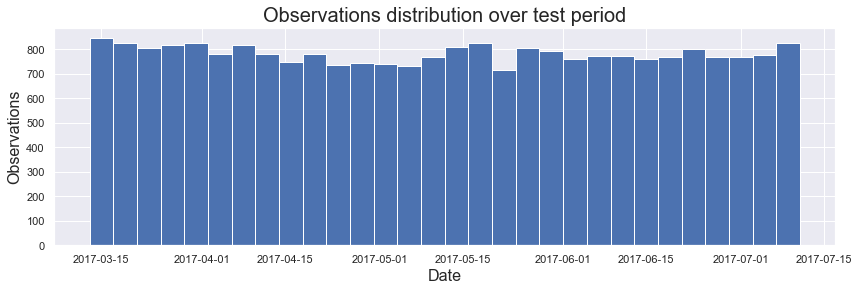

In [52]:
# Hist plot - observations by date

plt.figure(figsize=(14,4))
focus_test_data['date'].hist(bins=30)
plt.title('Observations distribution over test period', fontsize=20)
plt.ylabel('Observations', fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.show()

> * Period is given right: starts on 2017-03-13 and end on 2017-07-10

In [53]:
# check whether person is unique in each test groups
focus_test_data_holdout_list = focus_test_data.query('test_group == "holdout"')['person_id'].drop_duplicates().to_list()
print(len(focus_test_data_holdout_list))
focus_test_data_variant_list = focus_test_data.query('test_group == "variant"')['person_id'].drop_duplicates().to_list()
print(len(focus_test_data_variant_list))

11751
11749


In [54]:
# to check if one list contains person id of another list
def list_contains(list1, list2): 
    check = False
  
    for a in list1:
        for b in list2:
            if a == b: 
                check = True
                return check  
                  
    return check

In [55]:
list_contains(focus_test_data_holdout_list, focus_test_data_variant_list)

False

> * We have unique users in each test group - test possible

In [56]:
# data for hypothesis testing with "New Conversation Flow" data and start date - 2017-03-13

booking_rate_by_test_group = pd.read_sql_query(
'''
SELECT
    people_testsegmentation.test_name AS test_name,
    people_testsegmentation.test_group AS test_group,
    COUNT (conversations_conversation.id) AS requests_number,
    COUNT (conversations_conversation.booked_at) AS booked_number,
    printf ("%.2f", 
        COUNT (conversations_conversation.booked_at) *100 / 
            CAST (COUNT (conversations_conversation.id) as real) ) AS booking_rate
FROM
    conversations_conversation
LEFT JOIN services_service ON services_service.id = conversations_conversation.service_id
LEFT JOIN people_testsegmentation ON people_testsegmentation.person_id = conversations_conversation.requester_id
WHERE
    people_testsegmentation.test_name = "New Conversation Flow" AND
    people_testsegmentation.added >= 2017-03-13
GROUP BY
    people_testsegmentation.test_name,
    people_testsegmentation.test_group    
;
'''
, connection)
booking_rate_by_test_group

,test_name,test_group,requests_number,booked_number,booking_rate
0,New Conversation Flow,holdout,22895,9174,40.07
1,New Conversation Flow,variant,22941,10136,44.18


> * There is 4.11 p.p. higher booking rate with new conversation page (44.18 vs. 40.07)

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="5.2"></a><br/>

### 5.2. Is it statistically significant?

* To prove whether this difference is statistically significant we can use Z-test []
* Null hypothesis: the share of bookings by group "variant" is equal to the share of bookings by group "holdout"

In [57]:
bookings_holdout = booking_rate_by_test_group['booked_number'][0]
requests_holdout = booking_rate_by_test_group['requests_number'][0]
bookings_variant = booking_rate_by_test_group['booked_number'][1]
requests_variant = booking_rate_by_test_group['requests_number'][1]

In [58]:
alpha = 0.05

bookings = np.array([bookings_variant, bookings_holdout])
requests = np.array([requests_variant, requests_holdout])

# booking ratio per group
p1 = bookings[0]/requests[0]
p2 = bookings[1]/requests[1]

# booking ratio in combined set:
p_combined = (bookings[0] + bookings[1]) / (requests[0] + requests[1])

# difference of ratio in sets
difference = p1 - p2

# get statistics in the standard deviations on standard normal distribution
z_score = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/requests[0] + 1/requests[1]))

# set standard normal distribution (mean 0, standard deviation 1)
distr = st.norm(0, 1)

p_value = (1 - distr.cdf(abs(z_score))) * 2

print('p-value: ', p_value)

if (p_value < alpha):
    print("Reject the null hypothesis: there is a significant difference between shares")
else:
    print("Not possible to reject the null hypothesis, there is no reason to consider shares different")

p-value:  0.0
Reject the null hypothesis: there is a significant difference between shares


> * Probability: p-value is far less than alpha (5%) - shares are not equil
> * Z-test outcome shows a significant difference between share of bookings with "new" conversation page vs. share of bookings with "standard" conversation page

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="5.3"></a><br/>

### 5.3. What would you recommend as next steps?

> * As we have confirmed that new conversation page brings higher conversion rate, the next step would be to implement it for the permanent usage for owners
> * Would be a good idea to run test with the providers to be sure this new feature could be implemented for them as well

----

<a href="#Head"><font size="1.5">BACK TO CONTENTS</font></a><a name="6.0"></a><br/>

## SUMMARY

### To summarize all we have got from each step in analysis

#### Reviews on service provider or service requester:
> * Number of reviews: requesters (owners) give 5 times more reviews than providers
> * Owners tend to give more 5-star reviews from total number (76%), providers give reviews to other stars (1 to 4) twice more than requestors: ~11% vs. ~6%
> * Totally owners’ share by each star are at least two times higher than providers' one

#### Average price per service differs from one to another: "boarding" has the highest
> * Boarding - the highest price near 34.5 Dollars
> * Day-care - second price with 27 Dollars
> * Dog-walking - lowest price per service with 22 Dollars

#### Booking rate per service: "dog-walking" has the highest
> * Boarding - 41%
> * Day-care - 36%
> * Dog-walking - 48%, the highest among all

#### Cancellation rates by service: almost equal among all
> * Boarding - 9.7%
> * Day-care - 9.8%
> * Dog-walking - 9.5% - the lowest cancellation rate among all

#### Last month data to show decline - causes
> * As soon as we have the snapshot of the database which was taken on 2017-07-11 at midnight and only contains data reflecting events prior to that date, there is no data with conversations happened later than this cut and not all of the bookings were uploaded
> * There no reason to be concerned about it, data will be uploaded later with next update

#### Gross Billings and Net Revenue:
> * We see confidently growing figures of Gross Billing and Net Revenue over two years
> * During 2016 Net Revenue demonstrates slightly lower trend vs. Gross Billing
> * Since February 2017 till June 2017 we notice distinct growth in Gross Billings and Net Revenue
> * As we already know we should not look at the 2017 July data as soon as it was not updated yet

#### Take Rate (Net Revenue percentage out of Gross Billing):
> * Data range is 25 months: Jul 2015 - Jul 2017
> * First months of the period the take rate is almost 17%
> * Latest data shows 24% Take Rate in Jul 2017

#### Trend in Take Rate:
> * First observations in 2015 (Jul-Nov) show 16.67% as aggregated Take Rate level
> * There is visible growth started Dec 2015 at 17.89% and reached 24.08% Jul 2017
> * We can definitely see the growth in Net Revenue share in Gross Billings

#### Take Rate change causes:
> * Owner Fee and Service Fee are the contributors to the growth of Take Rate for the last 24 months

#### A/B Test analysis: "Did conversations with the new conversation page book at a higher rate?"
> * "New Conversation Flow" test covers 23 500 unique owner id
> * There is 4.11 p.p. higher booking rate with new conversation page (44.18 vs. 40.07)
> * Z-test outcome shows a significant difference between share of bookings with "new" conversation page vs. share of bookings with "standard" conversation page
> * As we have confirmed that new conversation page brings higher conversion rate, the next step would be to implement it for the permanent usage for owners
> * Would be a good idea to run test with the providers to be sure this new feature could be implemented for them as well


<a href="#TOP"><font size="0.5">TO THE TOP</font></a><a name="END"></a><br/>

---